In [4]:
!pip install datasets tensorflow  pandas numpy nltk

  Using cached datasets-3.2.0-py3-none-any.whl.metadata (20 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


Importing all the required Packages


In [6]:

import numpy as np
import pandas as pd
import re
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from gensim.models import KeyedVectors
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Expand the negative Words


In [7]:

def expand_negative_contractions(text):
    """Expands only negative contractions in the text"""
    negative_contractions = {
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "haven't": "have not",
        "hasn't": "has not",
        "hadn't": "had not",
        "won't": "will not",
        "wouldn't": "would not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "can't": "cannot",
        "couldn't": "could not",
        "shouldn't": "should not",
        "mightn't": "might not",
        "mustn't": "must not"
    }

    # Convert to lowercase and standardize spacing
    text = text.lower().strip()

    # Replace contractions with their expanded forms
    for contraction, expansion in negative_contractions.items():
        text = text.replace(contraction, expansion)

    # Handle remaining n't cases
    text = re.sub(r"(\w+)n't", r"\1 not", text)

    return text


Preprocess the data

In [8]:


def preprocess_text(text):
    # Initialize lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Get stopwords
    stop_words = set(stopwords.words('english'))

    # Define negative words to keep
    negative_words = {
        'no', 'not', 'none', 'nobody', 'nothing', 'nowhere', 'never',
        'neither', 'nor', 'cannot', 'without', 'against'
    }

    # Remove negative words from stopwords
    stop_words = stop_words - negative_words

    # First expand negative contractions
    text = expand_negative_contractions(text)

    # Remove mentions (e.g., @usernames)
    text = re.sub(r"@(\w+)", r"\1", text)

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)

    # Remove special characters but keep letters and spaces
    text = re.sub(r"[^a-zA-Z\s]", ' ', text)

    # Remove emojis using regex for Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Removes emojis and non-ASCII characters

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords (except negative words) and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words
            if word not in stop_words or word in negative_words]

    # Join words back together
    text = ' '.join(words)

    # Standardize multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text



Import , Call the Preprocess function and count the Class ditribution in all 3 datasets
Calculate and plot the avg Word count of the datasets

Loading and preprocessing datasets...
Preprocessing Train dataset...
Preprocessing Validation dataset...
Preprocessing Test dataset...

Dataset: Train

Class Distribution for Train Dataset:
gold_label
2    11735
3    10984
1     2869
4      819
0      225
Name: count, dtype: int64


<ipython-input-9-c5c9a4663dee>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


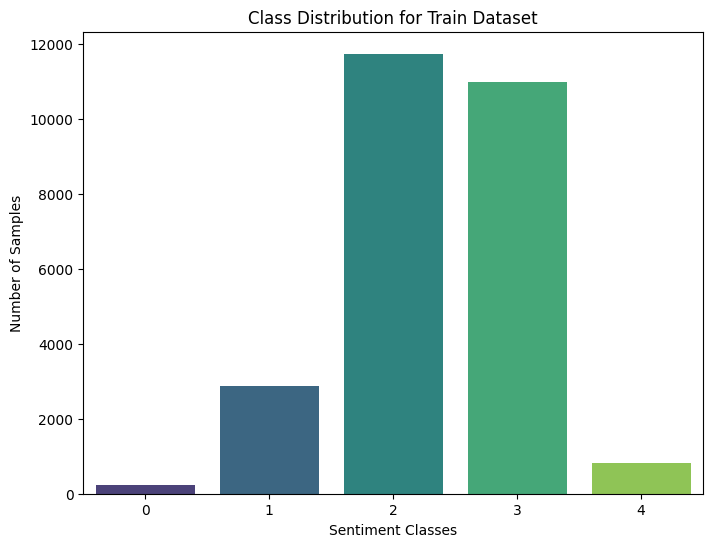


Train Dataset - Average Word Count: 12.10
Train Dataset - Median Word Count: 12.00


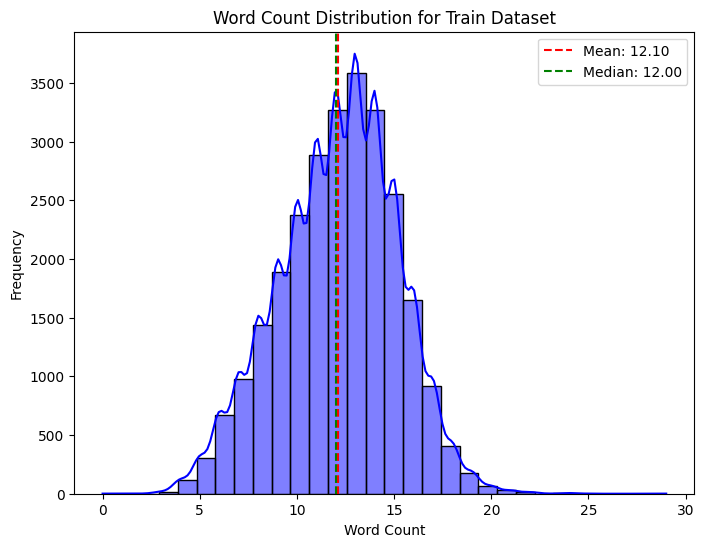

Train Dataset - Vocabulary Size: 27154

Dataset: Validation

Class Distribution for Validation Dataset:
gold_label
3    1938
2    1258
1     529
4     201
0      74
Name: count, dtype: int64


<ipython-input-9-c5c9a4663dee>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


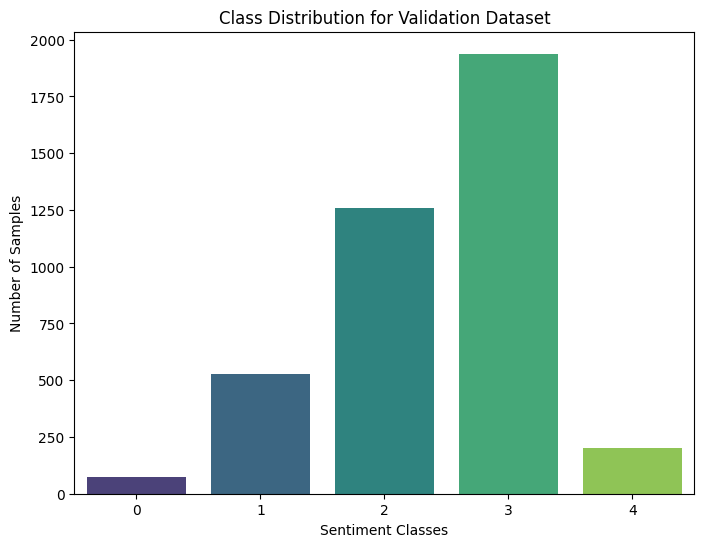


Validation Dataset - Average Word Count: 12.01
Validation Dataset - Median Word Count: 12.00


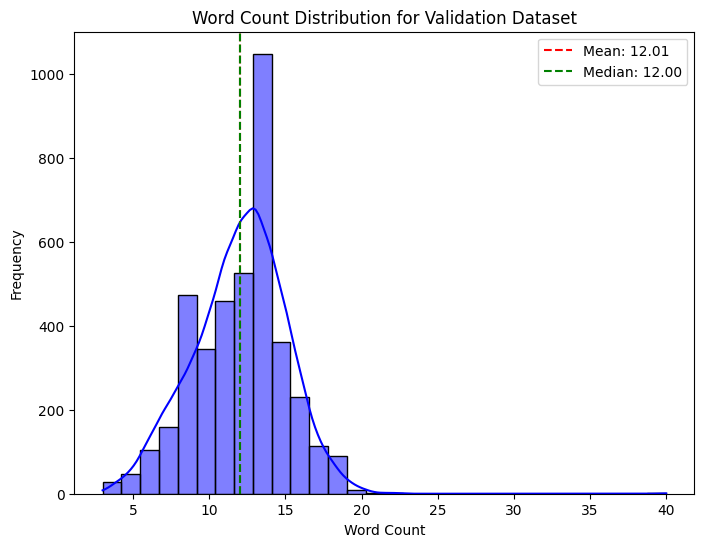

Validation Dataset - Vocabulary Size: 8560

Dataset: Test

Class Distribution for Test Dataset:
gold_label
2    6194
1    3545
3    2332
0     177
4     131
Name: count, dtype: int64


<ipython-input-9-c5c9a4663dee>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


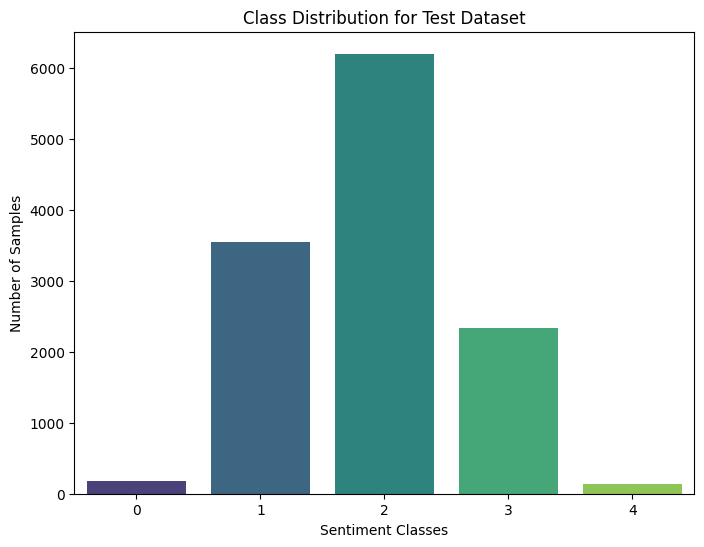


Test Dataset - Average Word Count: 10.39
Test Dataset - Median Word Count: 11.00


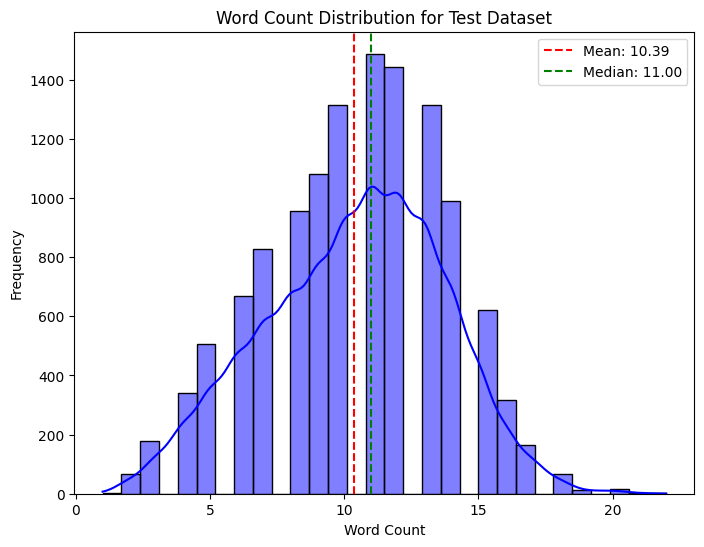

Test Dataset - Vocabulary Size: 18681


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Load and preprocess datasets
print("Loading and preprocessing datasets...")
train_df = pd.read_csv('https://raw.githubusercontent.com/osamuzahid/NLP/refs/heads/main/train.csv')
validation_df = pd.read_csv('https://raw.githubusercontent.com/osamuzahid/NLP/refs/heads/main/dev.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/osamuzahid/NLP/refs/heads/main/test.csv')

datasets = {
    "Train": train_df,
    "Validation": validation_df,
    "Test": test_df
}

# Apply preprocessing
for name, df in datasets.items():
    print(f"Preprocessing {name} dataset...")
    df['processed_text'] = df['text'].apply(preprocess_text)

# Perform analysis
for name, df in datasets.items():
    print(f"\nDataset: {name}")

    # Ensure 'processed_text' column has no NaN and all values are strings
    df['processed_text'] = df['processed_text'].fillna("").astype(str)

    # Class Distribution
    class_distribution = df['gold_label'].value_counts()
    print(f"\nClass Distribution for {name} Dataset:")
    print(class_distribution)

    # Plot Class Distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
    plt.title(f"Class Distribution for {name} Dataset")
    plt.xlabel("Sentiment Classes")
    plt.ylabel("Number of Samples")
    plt.show()

    # Word Count Distribution
    df['word_count'] = df['processed_text'].apply(lambda x: len(str(x).split()))

    average_word_count = df['word_count'].mean()
    median_word_count = df['word_count'].median()

    print(f"\n{name} Dataset - Average Word Count: {average_word_count:.2f}")
    print(f"{name} Dataset - Median Word Count: {median_word_count:.2f}")

    # Plot Word Count Distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df['word_count'], bins=30, kde=True, color='blue')
    plt.title(f"Word Count Distribution for {name} Dataset")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.axvline(average_word_count, color='red', linestyle='--', label=f"Mean: {average_word_count:.2f}")
    plt.axvline(median_word_count, color='green', linestyle='--', label=f"Median: {median_word_count:.2f}")
    plt.legend()
    plt.show()

    # Vocabulary Size
    unique_words = set()
    df['processed_text'].apply(lambda x: unique_words.update(x.split()))

    vocabulary_size = len(unique_words)
    print(f"{name} Dataset - Vocabulary Size: {vocabulary_size}")


Tokenize all the 3 datasets

In [10]:

# Fit tokenizer on training data only
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['processed_text'])

# Convert text to sequences
max_sequence_length = 50
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['processed_text']), maxlen=max_sequence_length)
X_validation = pad_sequences(tokenizer.texts_to_sequences(validation_df['processed_text']), maxlen=max_sequence_length)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['processed_text']), maxlen=max_sequence_length)


One Hot Encoding done on the y label

In [11]:
# Convert labels with high precision
y_train = to_categorical(train_df['gold_label'], num_classes=5)
y_validation = to_categorical(validation_df['gold_label'], num_classes=5)
y_test = to_categorical(test_df['gold_label'], num_classes=5)

Import word2vec model

In [13]:
from gensim.downloader import load

# Download the pre-trained Word2Vec model
w2v_model = load('word2vec-google-news-300')

print("Model loaded successfully!")

embedding_dim = 300
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model:
        embedding_matrix[i] = w2v_model[word]

Train the model on train set and Use of diffrenet hyperparameters for the validation set and the best one for test set

In [14]:
def experiment_with_parameters():
    experiments = [
        {
            "name": "Baseline",
            "params": {
                "learning_rate": 0.001,
                "dropout_rate": 0.5,
                "num_filters": 128,
                "kernel_sizes": [3, 4, 5],
            }
        },
        {
            "name": "Lower Learning Rate",
            "params": {
                "learning_rate": 0.0005,
                "dropout_rate": 0.5,
                "num_filters": 128,
                "kernel_sizes": [3, 4, 5],
            }
        },
        {
            "name": "Higher Dropout",
            "params": {
                "learning_rate": 0.001,
                "dropout_rate": 0.6,
                "num_filters": 128,
                "kernel_sizes": [3, 4, 5],
            }
        },
        {
            "name": "Different Kernel Sizes",
            "params": {
                "learning_rate": 0.001,
                "dropout_rate": 0.5,
                "num_filters": 128,
                "kernel_sizes": [2, 4, 6]
            }
        },
        {
            "name": "More Filters",
            "params": {
                "learning_rate": 0.001,
                "dropout_rate": 0.5,
                "num_filters": 256,
                "kernel_sizes": [3, 4, 5]
            }
        }
    ]

    best_model = None
    best_val_accuracy = 0
    best_params = None

    print("\nStarting Experiments:")
    print("="*50)

    for exp in experiments:
        print(f"\nExperiment: {exp['name']}")
        print(f"Parameters: {exp['params']}")

        # Build model with experimental parameters
        model = build_model_with_params(**exp['params'])

        # Train model
        history = model.fit(
            X_train, y_train,
            epochs=5,
            batch_size=32,
            validation_data=(X_validation, y_validation),
            verbose=1
        )

        # Evaluate on validation set
        val_loss, val_accuracy = model.evaluate(X_validation, y_validation, verbose=0)
        print(f"\nValidation Accuracy: {val_accuracy:.4f}")

        # Get detailed validation metrics
        val_pred = model.predict(X_validation)
        val_pred_classes = np.argmax(val_pred, axis=1)
        val_true_classes = np.argmax(y_validation, axis=1)
        print("\nValidation Classification Report:")
        print(classification_report(val_true_classes, val_pred_classes, digits=4))

        # Update best model if necessary
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            best_model = model
            best_params = exp['params']
            print(f"\nNew best model found! Accuracy: {val_accuracy:.4f}")

    print("\n" + "="*50)
    print("Best Model Parameters:")
    print(best_params)
    print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")

    return best_model

Best model is returned and is used to test on the test dataset


In [15]:
def build_model_with_params(learning_rate, dropout_rate, num_filters, kernel_sizes):
    input_layer = Input(shape=(max_sequence_length,))
    embedding_layer = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        trainable=False
    )(input_layer)

    conv_layers = []
    for kernel_size in kernel_sizes:
        conv = Conv1D(num_filters, kernel_size, activation='relu', padding='same')(embedding_layer)
        pool = GlobalMaxPooling1D()(conv)
        conv_layers.append(pool)

    concat = Concatenate()(conv_layers)
    dropout = Dropout(dropout_rate)(concat)
    dense = Dense(128, activation='relu')(dropout)  # Fixed dense units at 128
    output = Dense(5, activation='softmax')(dense)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


**EVALUATION : **
Experiment with various paramters and evaluate model with best parameters on the test data


In [16]:

# Run experiments and get best model
print("Starting experimental evaluation...")
best_model = experiment_with_parameters()

# Evaluate best model on test set
print("\n" + "="*50)
print("Final Evaluation on Test Set:")
print("="*50)

test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

# Get detailed test metrics
test_pred = best_model.predict(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
test_true_classes = np.argmax(y_test, axis=1)

print("\nTest Classification Report:")
print(classification_report(test_true_classes, test_pred_classes))
# Define label names
label_names = ['very negative', 'negative', 'neutral', 'positive', 'strong positive']


Starting experimental evaluation...

Starting Experiments:

Experiment: Baseline
Parameters: {'learning_rate': 0.001, 'dropout_rate': 0.5, 'num_filters': 128, 'kernel_sizes': [3, 4, 5]}
Epoch 1/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5347 - loss: 1.0281 - val_accuracy: 0.5242 - val_loss: 1.1320
Epoch 2/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6278 - loss: 0.8434 - val_accuracy: 0.4988 - val_loss: 1.1196
Epoch 3/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6596 - loss: 0.7760 - val_accuracy: 0.4935 - val_loss: 1.1500
Epoch 4/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6943 - loss: 0.7037 - val_accuracy: 0.5155 - val_loss: 1.1481
Epoch 5/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7287 - loss: 0.6345 - val_accuracy: 0.5010 - val_loss: 1.2399

Validation Accuracy: 0.5010
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Validation Classification Report:
              precision    recall  f1-score   support

           0     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5310 - loss: 1.0389 - val_accuracy: 0.5020 - val_loss: 1.1262
Epoch 2/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6360 - loss: 0.8399 - val_accuracy: 0.5200 - val_loss: 1.1288
Epoch 3/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6587 - loss: 0.7787 - val_accuracy: 0.4775 - val_loss: 1.2143
Epoch 4/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6899 - loss: 0.7130 - val_accuracy: 0.5065 - val_loss: 1.1697
Epoch 5/5
833/833 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7237 - loss: 0.6410 - val_accuracy: 0.5150 - val_loss: 1.2102

Validation Accuracy: 0.5150
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Validation Classification Report:
              precision    recall  f1-score   support

           0     0.4000    0.0270    0.0506        74
           1     0.3387    0.1985    0.2503       529
           2     0.4238    0.5286    0.4705      1258
           3     0.6091    0.6641    0.63

Error analysis of the test set on the best model parameters

In [23]:

def analyze_errors(model, X_test, y_test, processed_texts, original_texts, label_names):
    # Predict the labels
    predictions = model.predict(X_test)

    # Convert the predictions and true labels to classes
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test, axis=1)

    # Initialize a confusion matrix
    conf_matrix = confusion_matrix(true_classes, predicted_classes)

    # Collect errors (misclassifications)
    errors = []

    for i in range(len(true_classes)):
        if true_classes[i] != predicted_classes[i]:
            error = {
                'original_text': original_texts[i],
                'processed_text': processed_texts[i],
                'true_label': label_names[true_classes[i]],
                'predicted_label': label_names[predicted_classes[i]],
                'confidence': predictions[i][predicted_classes[i]]
            }
            errors.append(error)

    return conf_matrix, errors


# Perform error analysis on the best model
print("\nError Analysis for Best Model:")
conf_matrix, errors = analyze_errors(
    best_model,
    X_test,
    y_test,
    test_df['processed_text'].values,
    test_df['text'].values,
    label_names
)

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nSample Misclassifications:")
for error in errors[:5]:  # Show top 5 errors for brevity
    print(f"Original Text: {error['original_text']}")
    print(f"Processed Text: {error['processed_text']}")
    print(f"True Label: {error['true_label']}")
    print(f"Predicted Label: {error['predicted_label']}")
    print(f"Confidence: {error['confidence']:.4f}")
    print("-" * 50)



Error Analysis for Best Model:
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Confusion Matrix:
[[  24  116   23   14    0]
 [  27 1500 1547  469    2]
 [   7  958 3388 1838    3]
 [   5  132  572 1572   51]
 [   2    3    3  102   21]]

Sample Misclassifications:
Original Text: @user we don't want Romney #TheSnake ! We want Rudys loyalty! Retweet #MAGA #Trump2016 #NeverRomney #Fraud #Phony #DrainTheSwamp
Processed Text: user not want romney thesnake want rudys loyalty retweet maga trump neverromney fraud phony draintheswamp
True Label: positive
Predicted Label: negative
Confidence: 0.5185
--------------------------------------------------
Original Text: omg that would be the funniest thing ever #epic #draintheswamp #LockHerUp {URL}
Processed Text: omg would funniest thing ever epic draintheswamp lockherup url
True Label: positive
Predicted Label: strong positive
Confidence: 0.6670
--------------------------------------------------
Original Text: The CORRUPT @HouseGOP FORCED Liberal Democr